In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns

In /home/estefania/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/estefania/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/estefania/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/estefania/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/estefania/.local/lib/python3.6/site-packages/matplo

In [2]:
#directoriosancor="/home/manuela/sancor-2.0/" #MANU
directoriosancor="/home/estefania/Desktop/sancor-2.0/"   #EDU

#directoriochirps="/home/manuela/sancor/CHIRPS/"   #MANU
directoriochirps="/home/estefania/Desktop/lluviasarg/"   #EDU

directoriocsvs=directoriosancor+"1CSV/"
directoriopuntos=directoriocsvs+"Agua/"

In [3]:
#VERA JUAN PABLO
df_puntos_agua = pd.read_csv(directoriopuntos+"AguaVera21022019_trans.csv")
e = 22
rangodefilas=range(54)
directoriolectura=directoriocsvs+"Vera_so_csvs/"
prefijolectura="Vera_so_" 
long = df_puntos_agua.Long_trans[e]
lat = df_puntos_agua.Lat_trans[e]

/home/estefania/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:1290: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  squeeze=False)


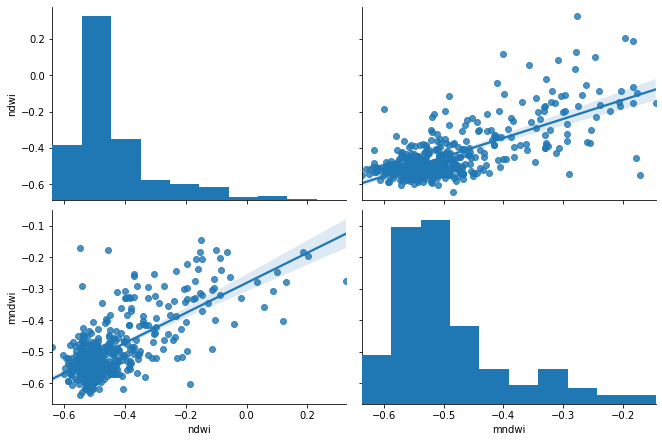

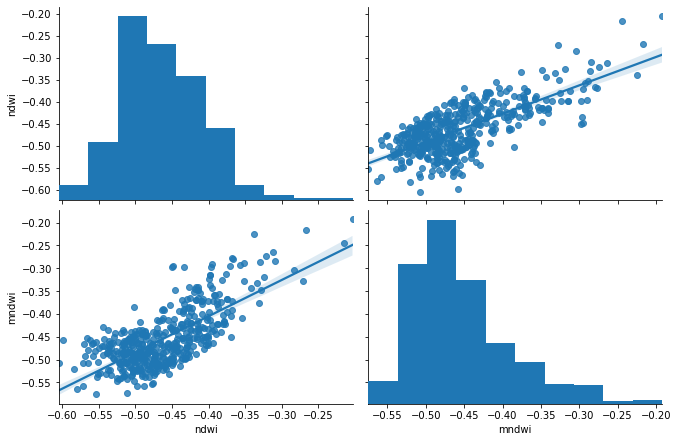

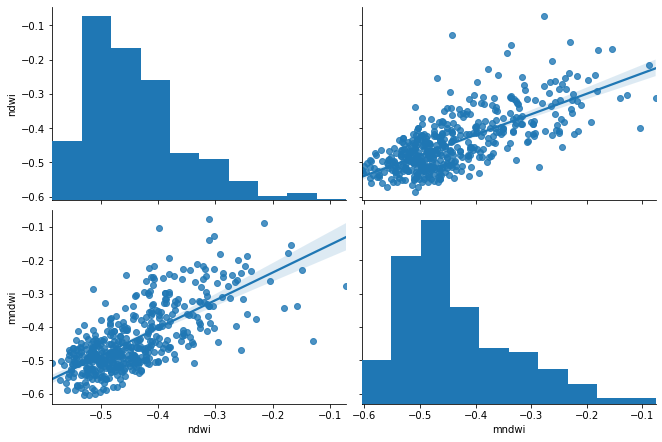

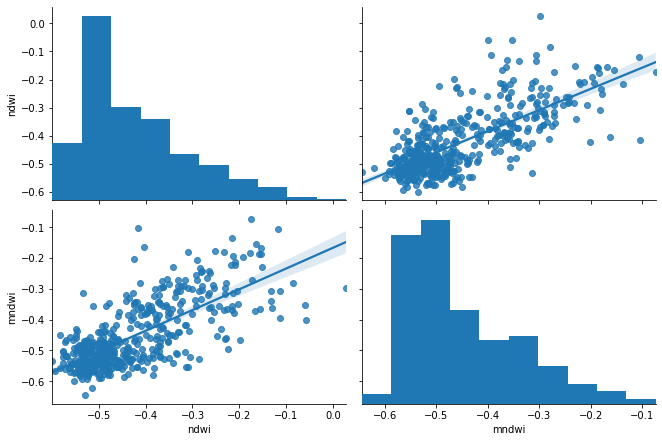

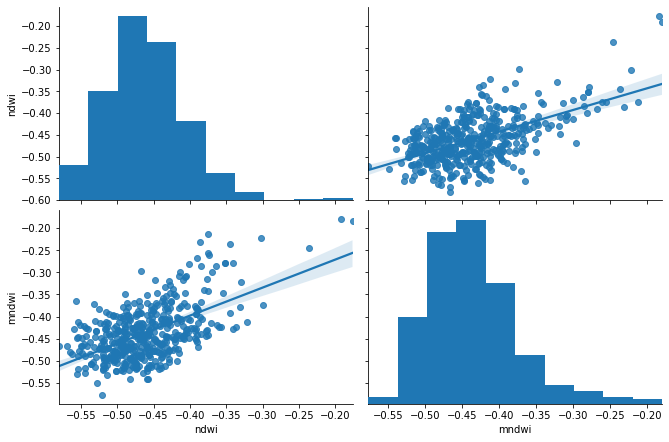

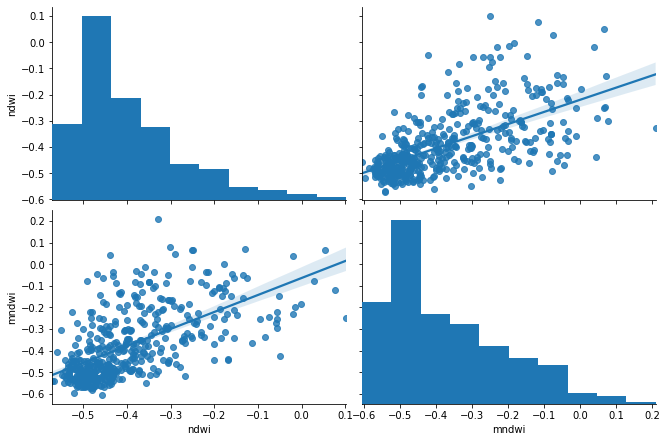

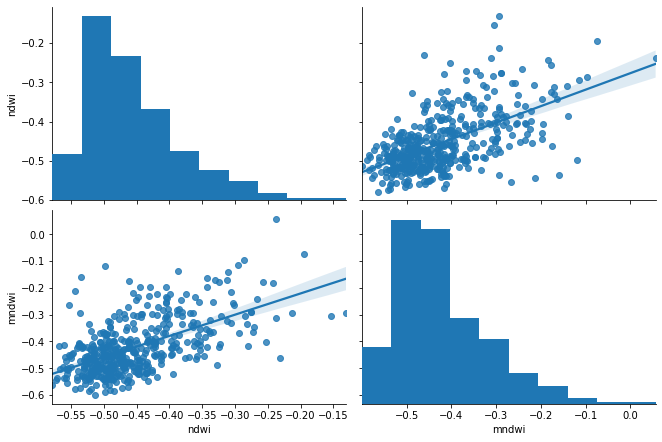

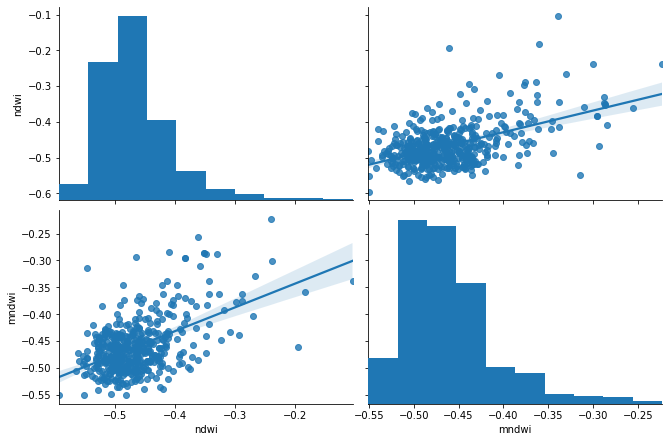

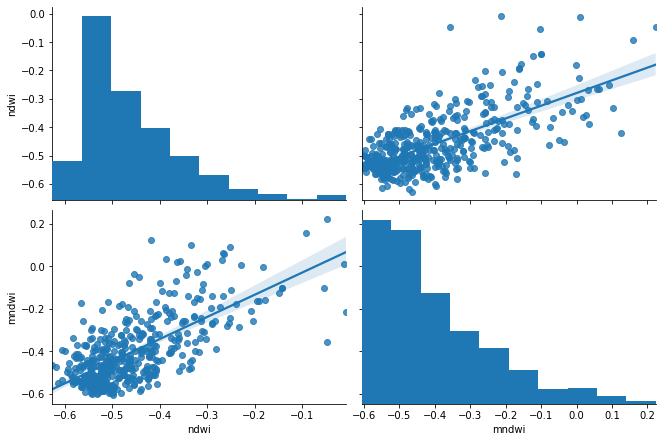

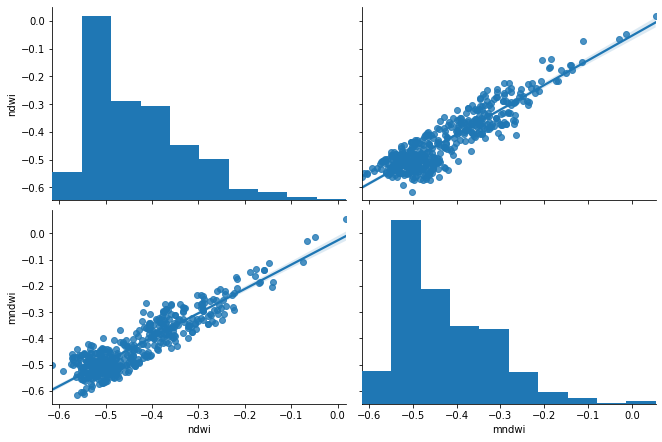

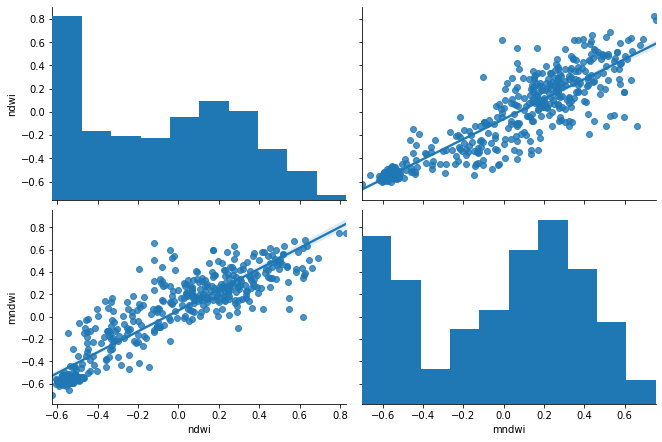

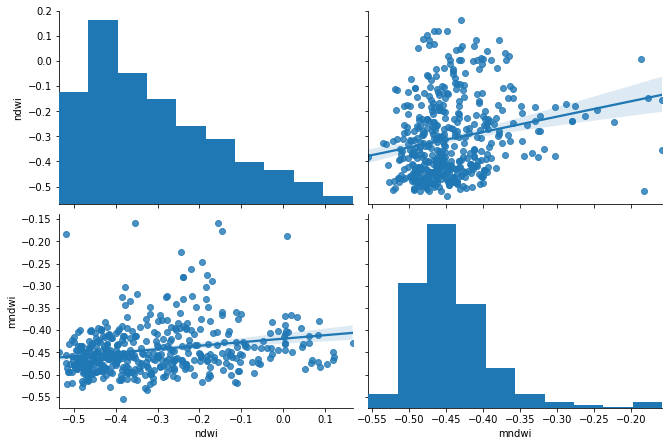

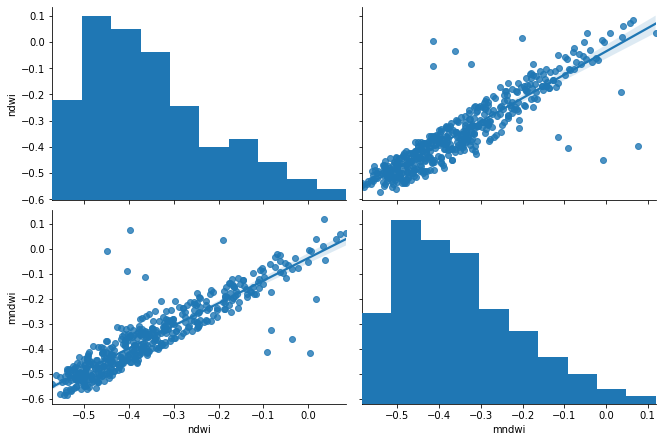

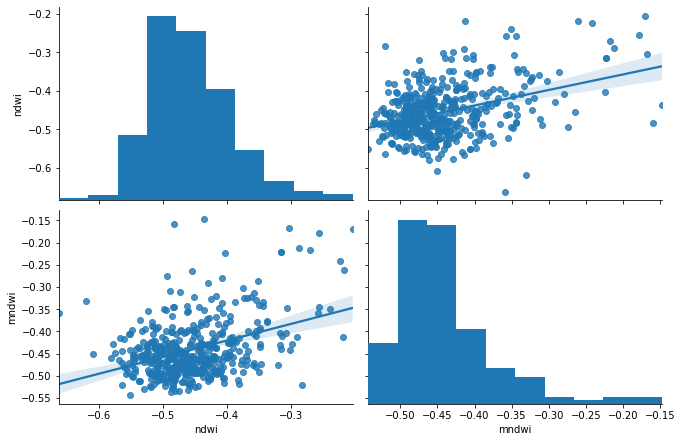

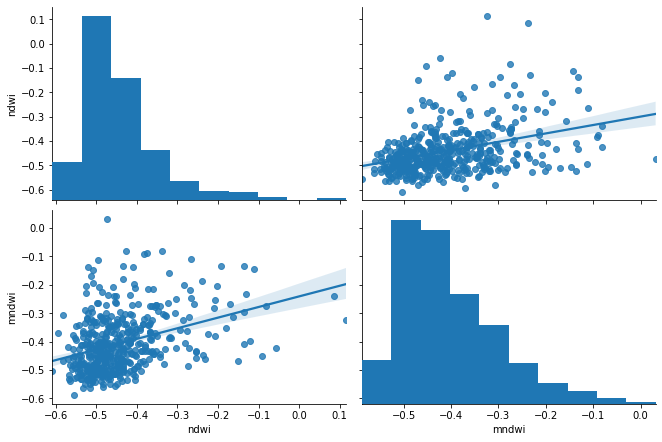

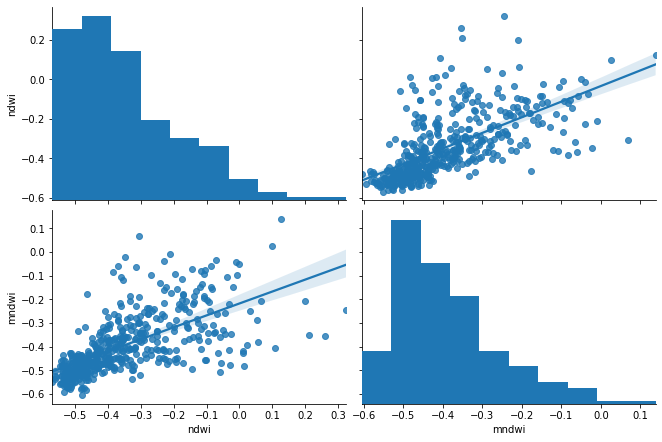

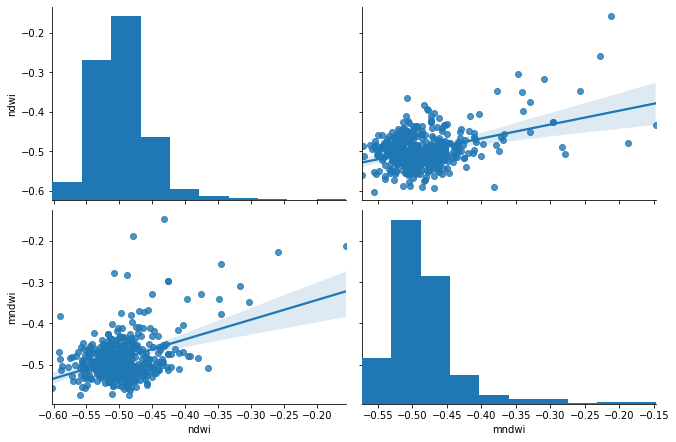

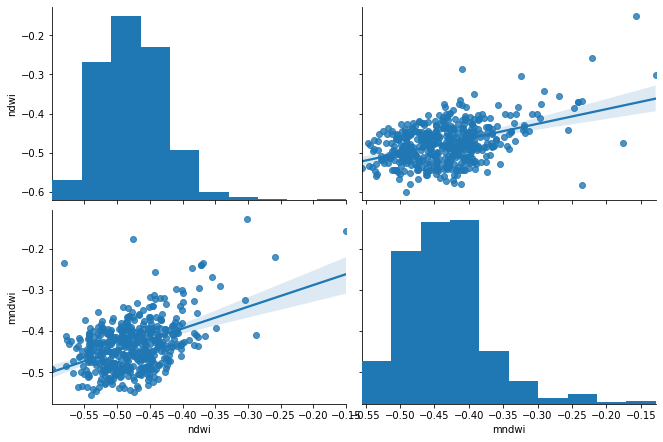

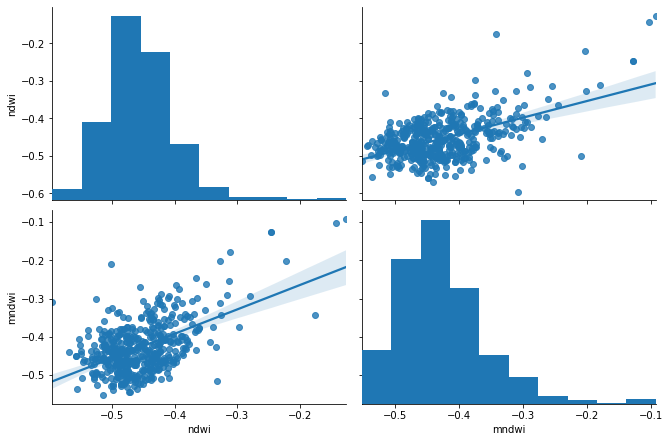

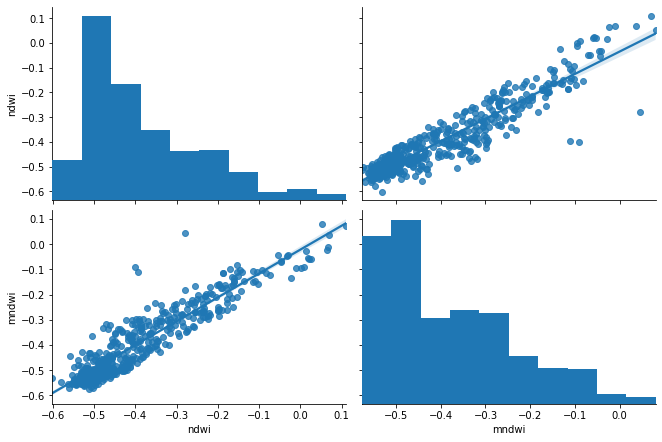

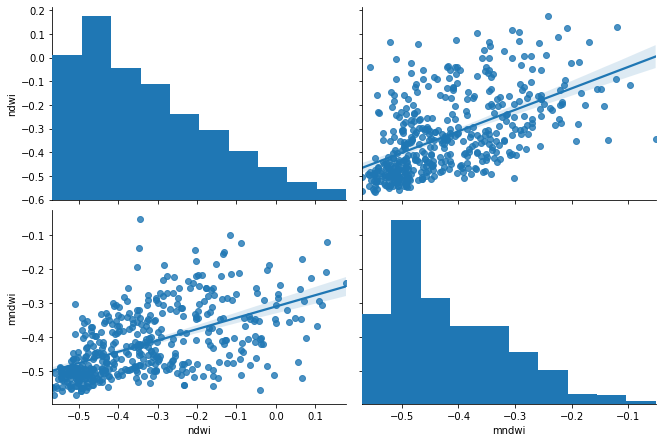

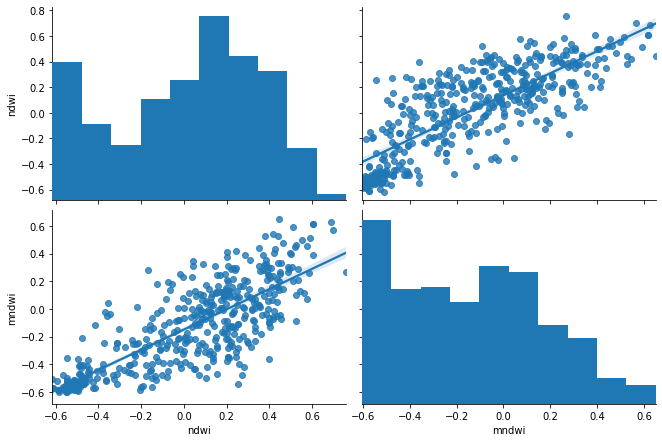

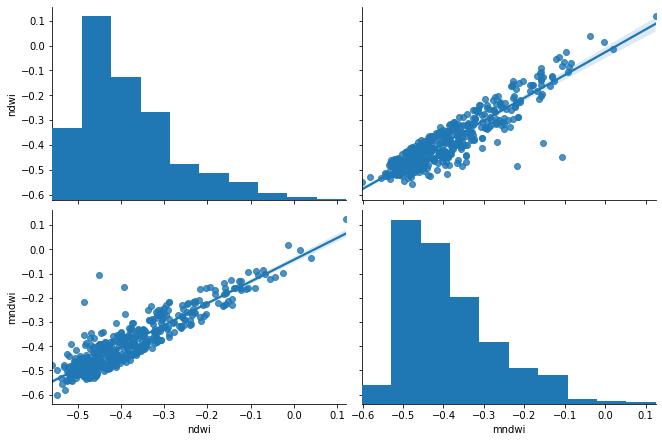

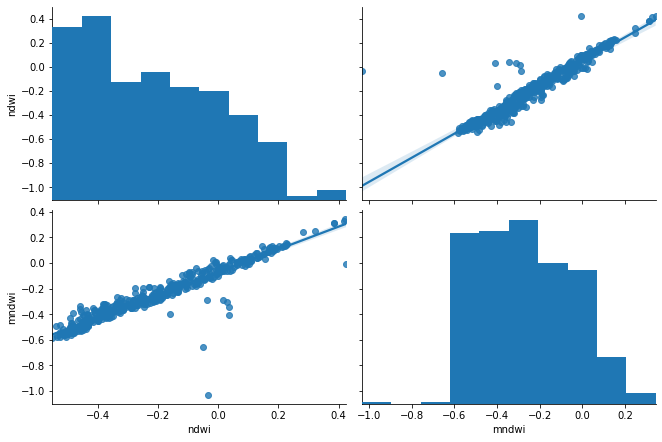

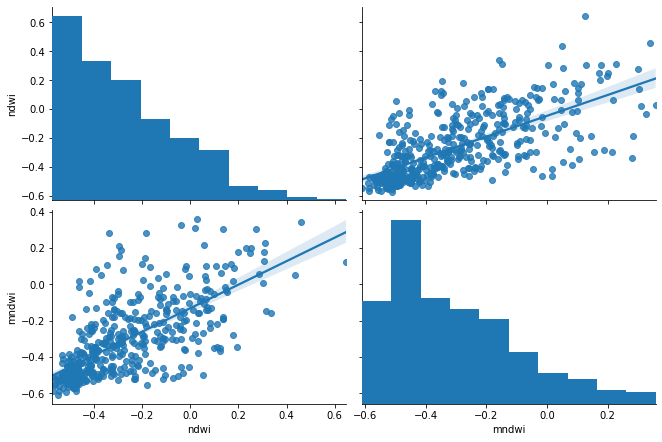

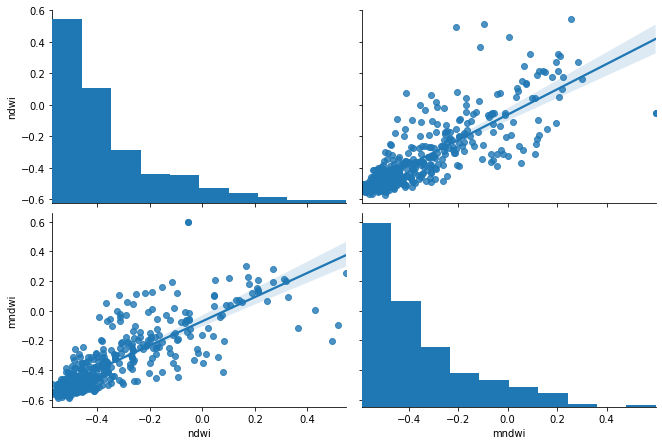

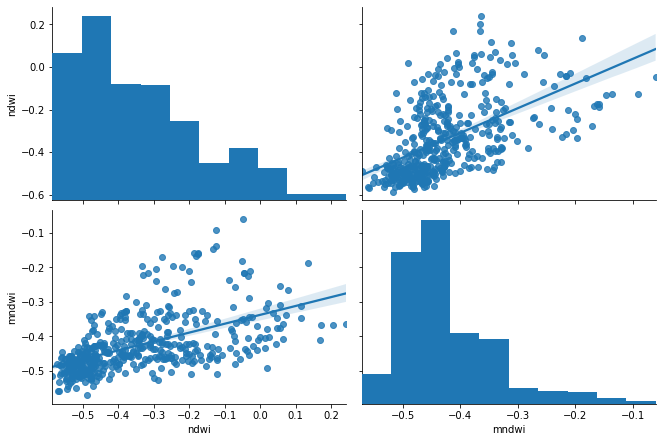

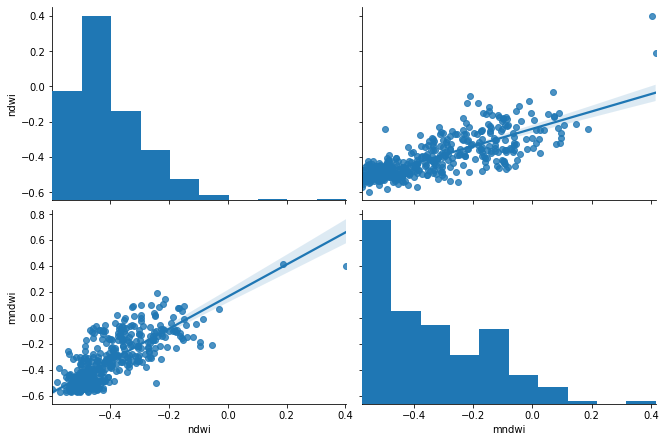

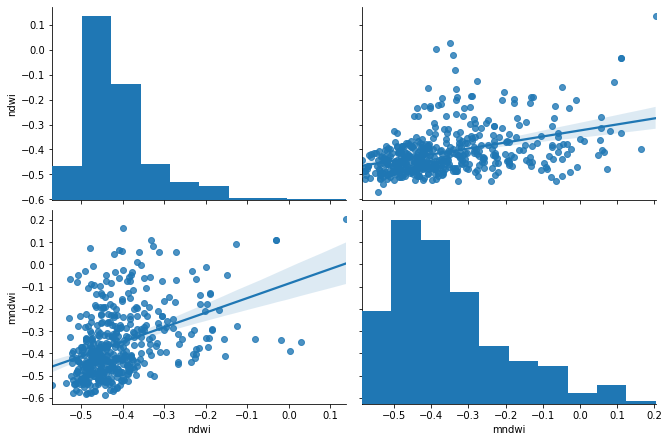

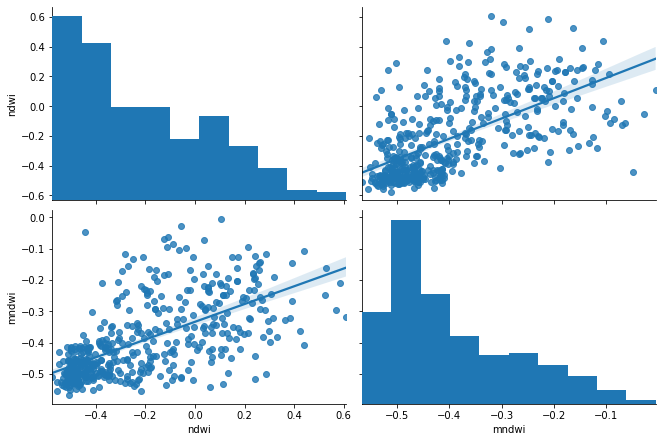

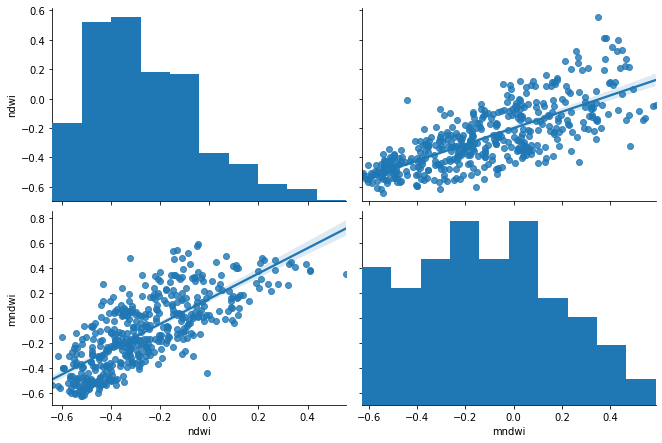

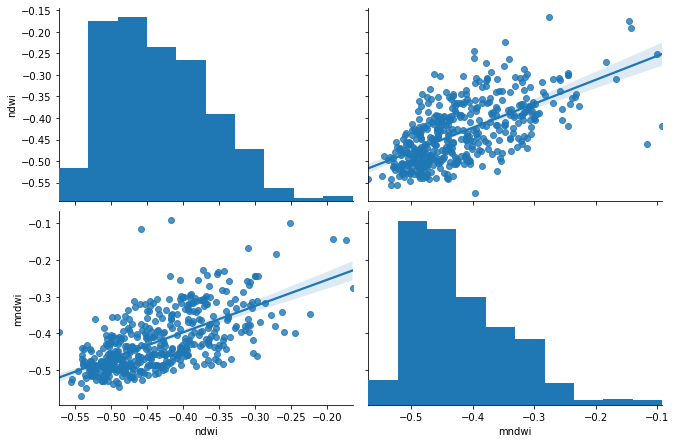

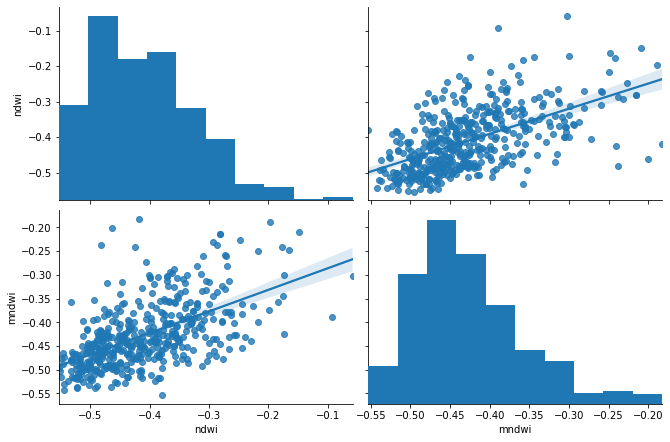

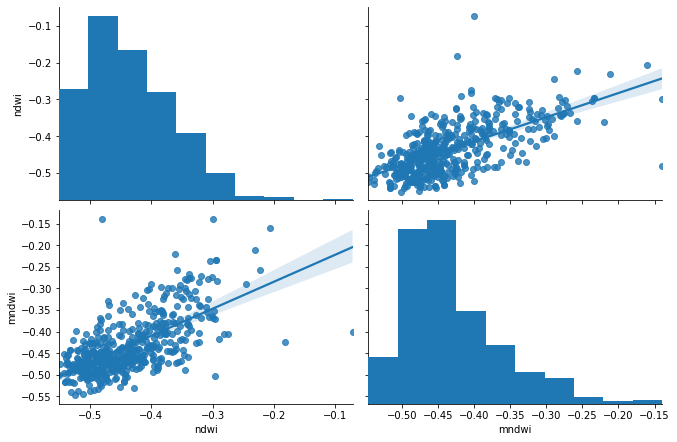

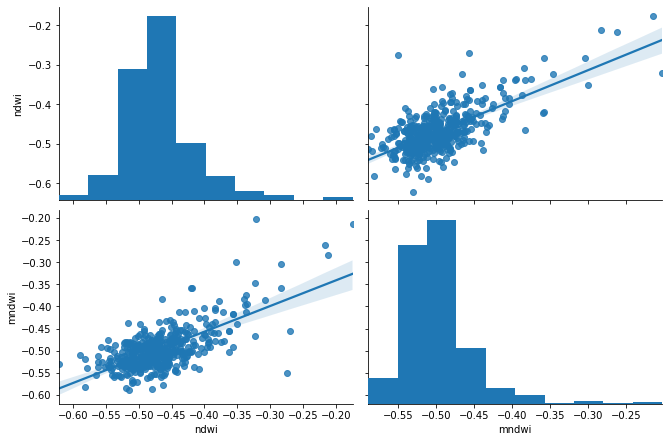

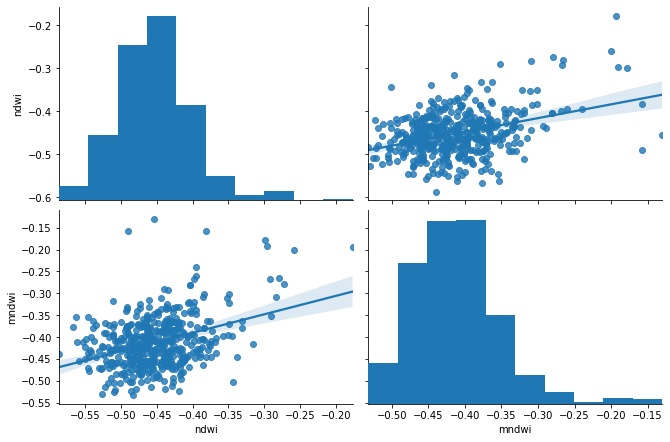

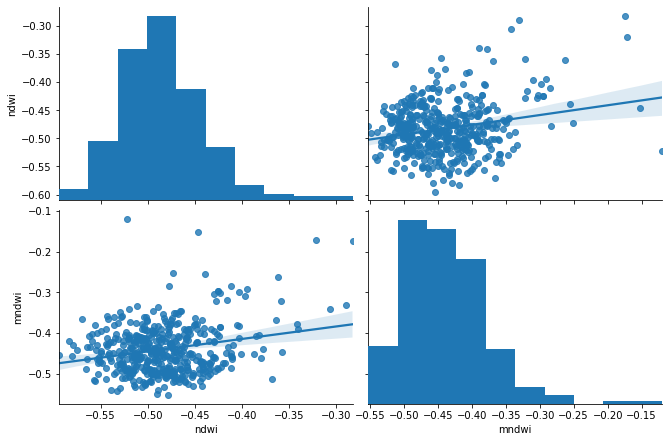

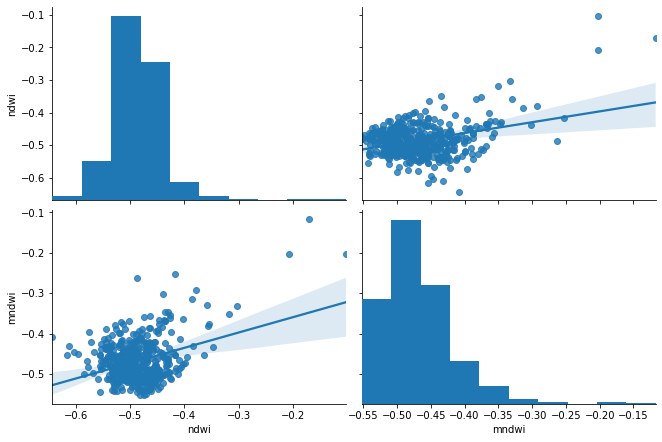

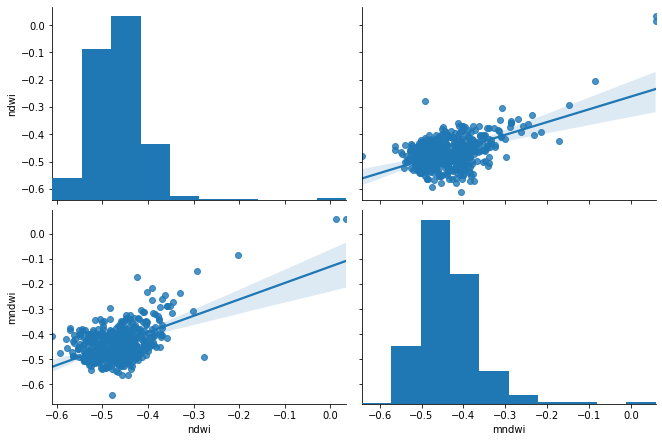

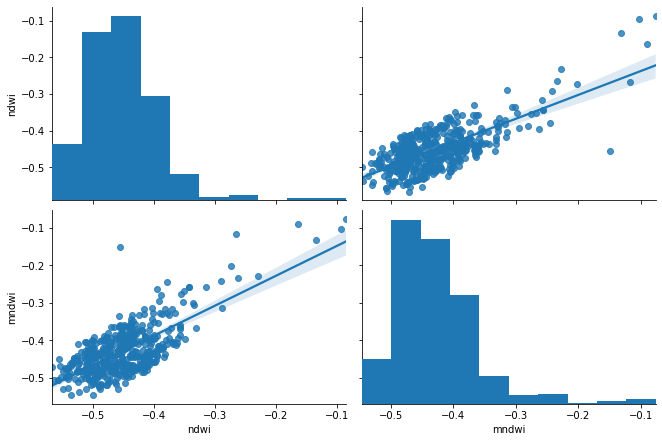

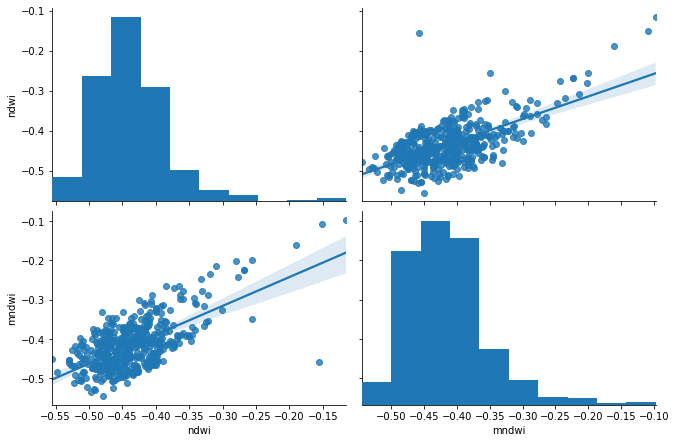

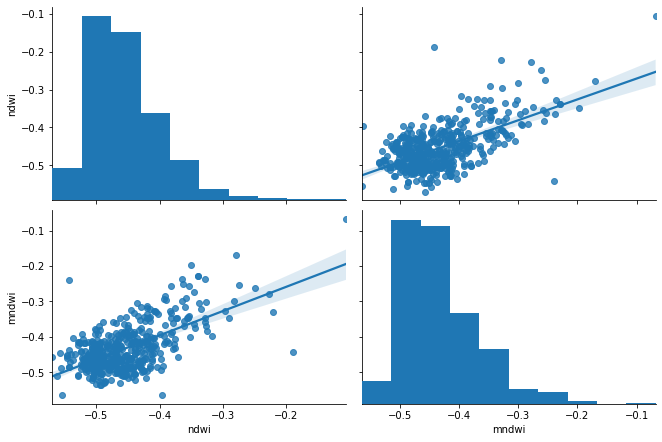

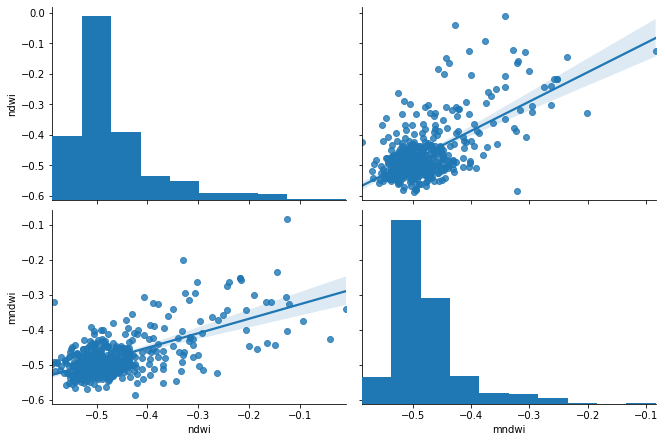

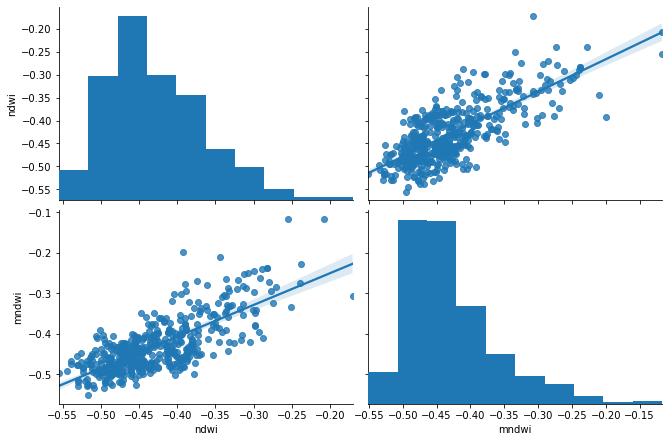

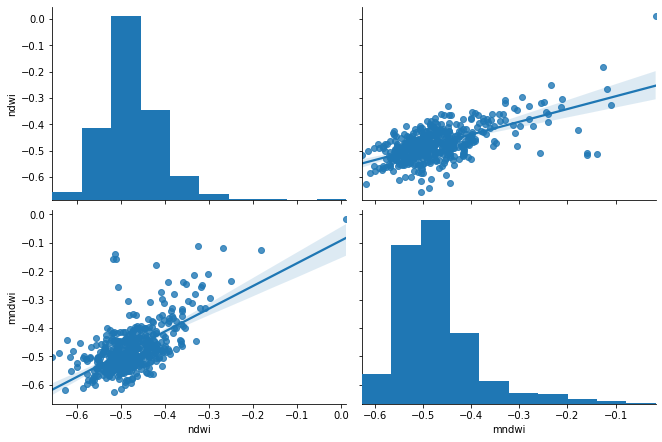

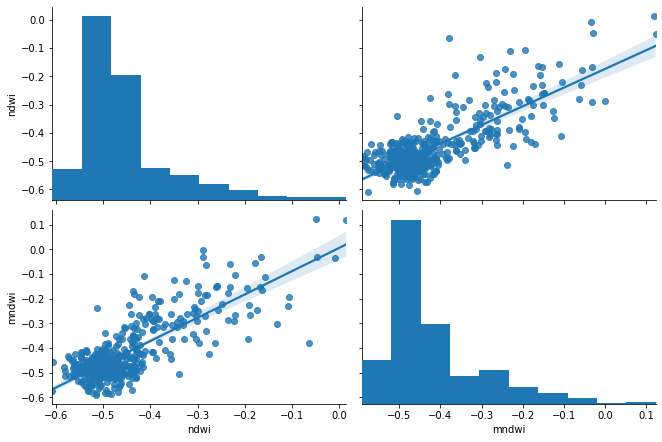

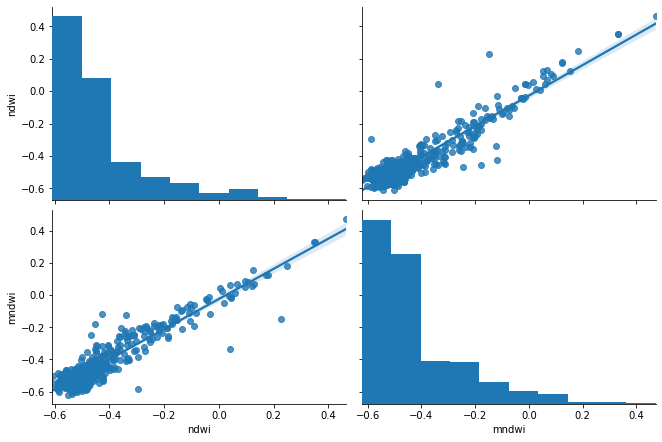

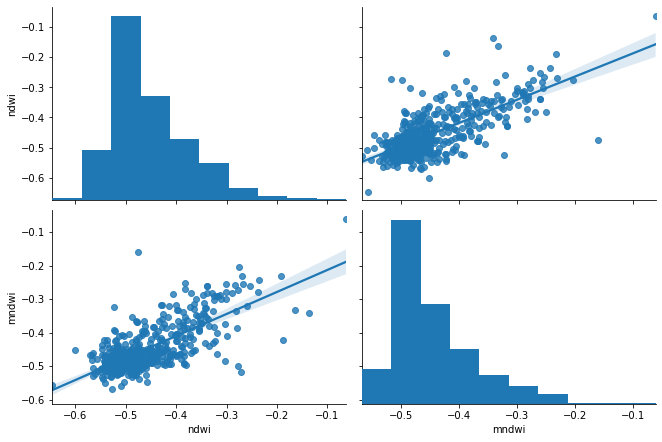

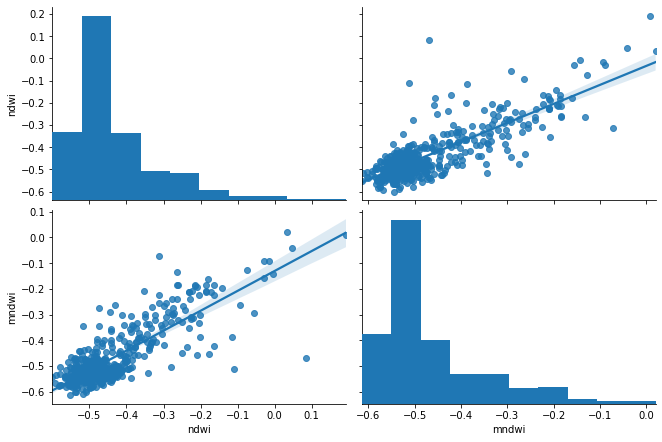

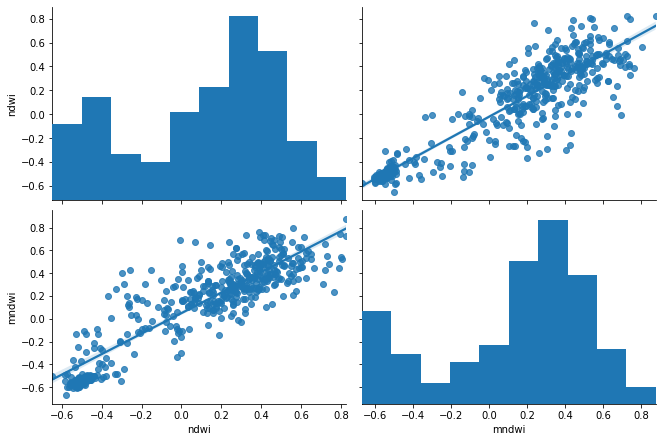

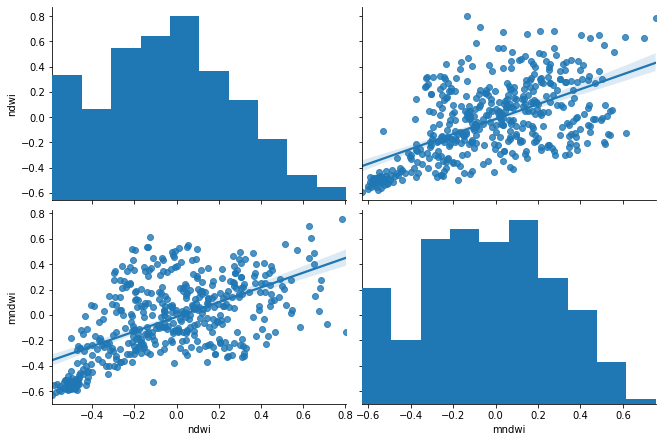

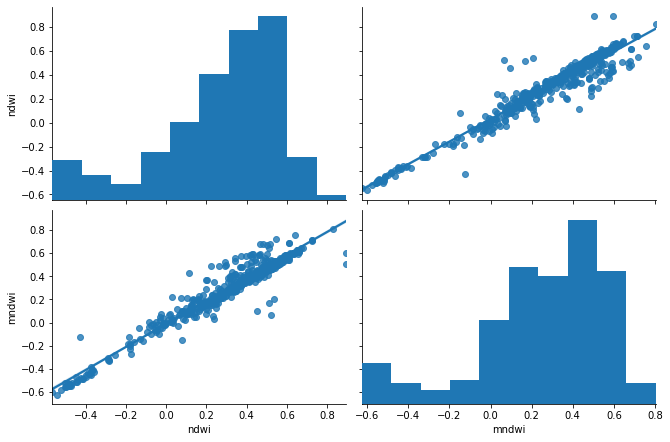

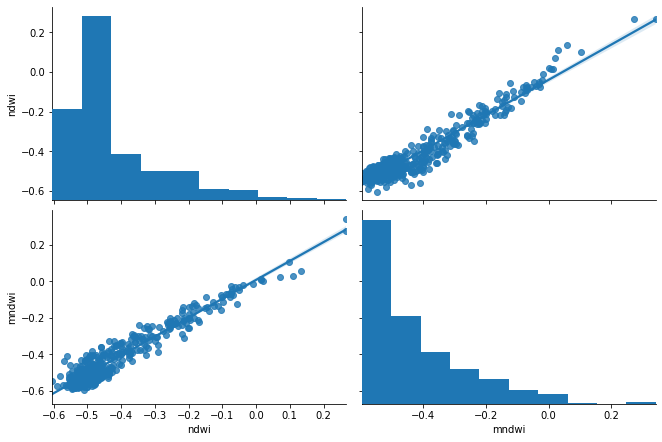

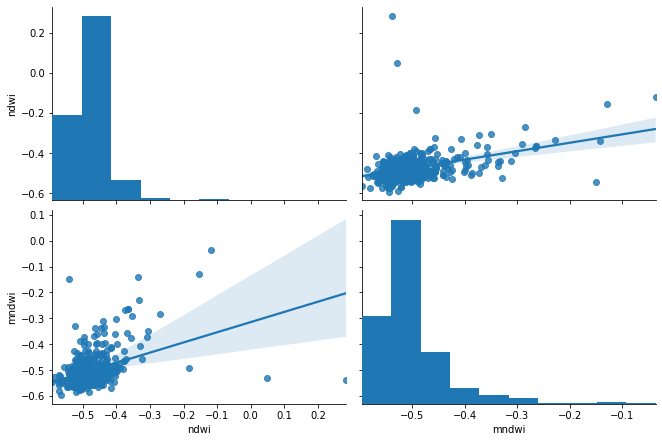

In [6]:
pendientes=[]
ordenadasalorigen=[]
for e in rangodefilas:
    for k in range(1):
        df_mndwi = pd.read_csv(directoriolectura+prefijolectura+ str(e).zfill(3)+"_mndwi_"+str(2*k+1)+"x"+str(2*k+1) +".csv")
        df_ndwi = pd.read_csv(directoriolectura+prefijolectura+ str(e).zfill(3)+"_ndwi_"+str(2*k+1)+"x"+str(2*k+1) +".csv")

        df_mndwi = df_mndwi.drop(labels = "Unnamed: 0.1" , axis = 1)    
        df_mndwi = df_mndwi.drop(labels = "Unnamed: 0" , axis = 1)
        df_mndwi = df_mndwi.drop(labels = "fecha" , axis = 1)
        df_mndwi = df_mndwi.drop(labels = "indice" , axis = 1)
        df_mndwi = df_mndwi.rename(columns = {"promedio":"mndwi"})

        df_ndwi = df_ndwi.drop(labels = "Unnamed: 0.1" , axis = 1)   
        df_ndwi = df_ndwi.drop(labels = "Unnamed: 0" , axis = 1)
        df_ndwi = df_ndwi.drop(labels = "fecha" , axis = 1)
        df_ndwi = df_ndwi.drop(labels = "indice" , axis = 1)
        df_ndwi = df_ndwi.rename(columns = {"promedio":"ndwi"})
    
        model = LinearRegression().fit(df_ndwi, df_mndwi)
        #model.score(df_ndwi, df_mndwi)
        pendientes.append(model.coef_[0][0])    #término lineal
        ordenadasalorigen.append(model.intercept_[0])  #término independiente
    
        result = pd.concat([df_ndwi, df_mndwi],axis = 1)
        sns.pairplot(data=result, kind="reg" , vars = ["ndwi","mndwi"], height = 3, aspect =1.5)

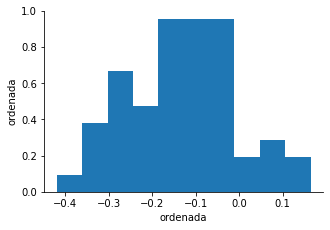

In [5]:
df = DataFrame (pendientes,columns=["cof lineal"])
df["ordenada"]=ordenadasalorigen
sns.pairplot(data=df, height = 3, aspect =1.5, vars=["ordenada"])

In [21]:
for e in rangodefilas:
    if df["ordenada"][e]<-0.2:
        print(e)

0
7
11
13
14
15
16
20
26
29
32
34
35
36
37
42
53


In [22]:
df

,cof lineal,ordenada
0,0.476891,-0.281190
1,0.794361,-0.087205
2,0.828553,-0.071200
3,0.675205,-0.166431
4,0.632369,-0.144964
5,0.787447,-0.063312
6,0.793000,-0.062387
7,0.440204,-0.255468
8,1.041259,0.074592
9,0.924654,-0.026857


In [48]:
x=[i/100 for i in range(-5,10)]
y=[model.coef_[0][0]*i+model.intercept_[0] for i in x]

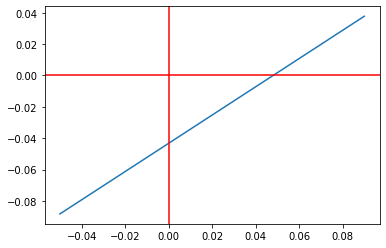

In [49]:
plt.plot(x, y) 
plt.axhline(0,color = 'red')
plt.axvline(0,color = 'red')